In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
file_path = r"D:\Real Time Finance API Client\Data\all_stocks_daily_returns.csv"
df = pd.read_csv(file_path)

df.head()

,Date,AAPL,MSFT,GOOGL,TSLA,AMZN
0,2025-03-12,-0.017479,0.007412,0.018715,0.075939,0.011699
1,2025-03-13,-0.033644,-0.011741,-0.026031,-0.029868,-0.025140
2,2025-03-14,0.018171,0.025847,0.016773,0.038641,0.020940
3,2025-03-17,0.002389,0.000360,-0.007251,-0.047884,-0.011164
4,2025-03-18,-0.006121,-0.013326,-0.022034,-0.053359,-0.014918


In [ ]:
print("🟢 Dataset Shape:", df.shape)
print("\n🔍 Data Types:\n", df.dtypes)

print("\n🔍 Missing Values:\n", df.isnull().sum())

print("\n🧹 Duplicate Rows:", df.duplicated().sum())

print("\n📊 Statistical Summary:\n")
display(df.describe())

print("📌 Columns:\n", df.columns.tolist())

df.head()


🟢 Dataset Shape: (99, 6)

🔍 Data Types:
 Date      object
AAPL     float64
MSFT     float64
GOOGL    float64
TSLA     float64
AMZN     float64
dtype: object

🔍 Missing Values:
 Date     0
AAPL     0
MSFT     0
GOOGL    0
TSLA     0
AMZN     0
dtype: int64

🧹 Duplicate Rows: 0

📊 Statistical Summary:



,AAPL,MSFT,GOOGL,TSLA,AMZN
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,-0.000549,0.003395,0.001671,0.003868,0.001223
std,0.026180,0.017867,0.021726,0.048044,0.025909
min,-0.092456,-0.036606,-0.072597,-0.142599,-0.089791
25%,-0.010653,-0.003548,-0.011400,-0.023045,-0.010548
50%,0.001049,0.001944,0.002423,0.001043,0.001144
75%,0.007051,0.008631,0.015728,0.035000,0.014062
max,0.153288,0.101337,0.096821,0.226900,0.119770


📌 Columns:
 ['Date', 'AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']


,Date,AAPL,MSFT,GOOGL,TSLA,AMZN
0,2025-03-12,-0.017479,0.007412,0.018715,0.075939,0.011699
1,2025-03-13,-0.033644,-0.011741,-0.026031,-0.029868,-0.025140
2,2025-03-14,0.018171,0.025847,0.016773,0.038641,0.020940
3,2025-03-17,0.002389,0.000360,-0.007251,-0.047884,-0.011164
4,2025-03-18,-0.006121,-0.013326,-0.022034,-0.053359,-0.014918


In [8]:
# --------------------------------------
# 🕒 Convert 'Date' column to datetime
# --------------------------------------

df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", errors='coerce')

# Check for parsing errors
print("🧪 Any NaT after conversion:", df['Date'].isna().sum())

# Optional: Set 'Date' as the index
df.set_index('Date', inplace=True)

# Confirm the changes
print("\n✅ Date column converted and set as index:")
display(df.head())


🧪 Any NaT after conversion: 0

✅ Date column converted and set as index:


,AAPL,MSFT,GOOGL,TSLA,AMZN
Date,,,,,
2025-03-12,-0.017479,0.007412,0.018715,0.075939,0.011699
2025-03-13,-0.033644,-0.011741,-0.026031,-0.029868,-0.025140
2025-03-14,0.018171,0.025847,0.016773,0.038641,0.020940
2025-03-17,0.002389,0.000360,-0.007251,-0.047884,-0.011164
2025-03-18,-0.006121,-0.013326,-0.022034,-0.053359,-0.014918


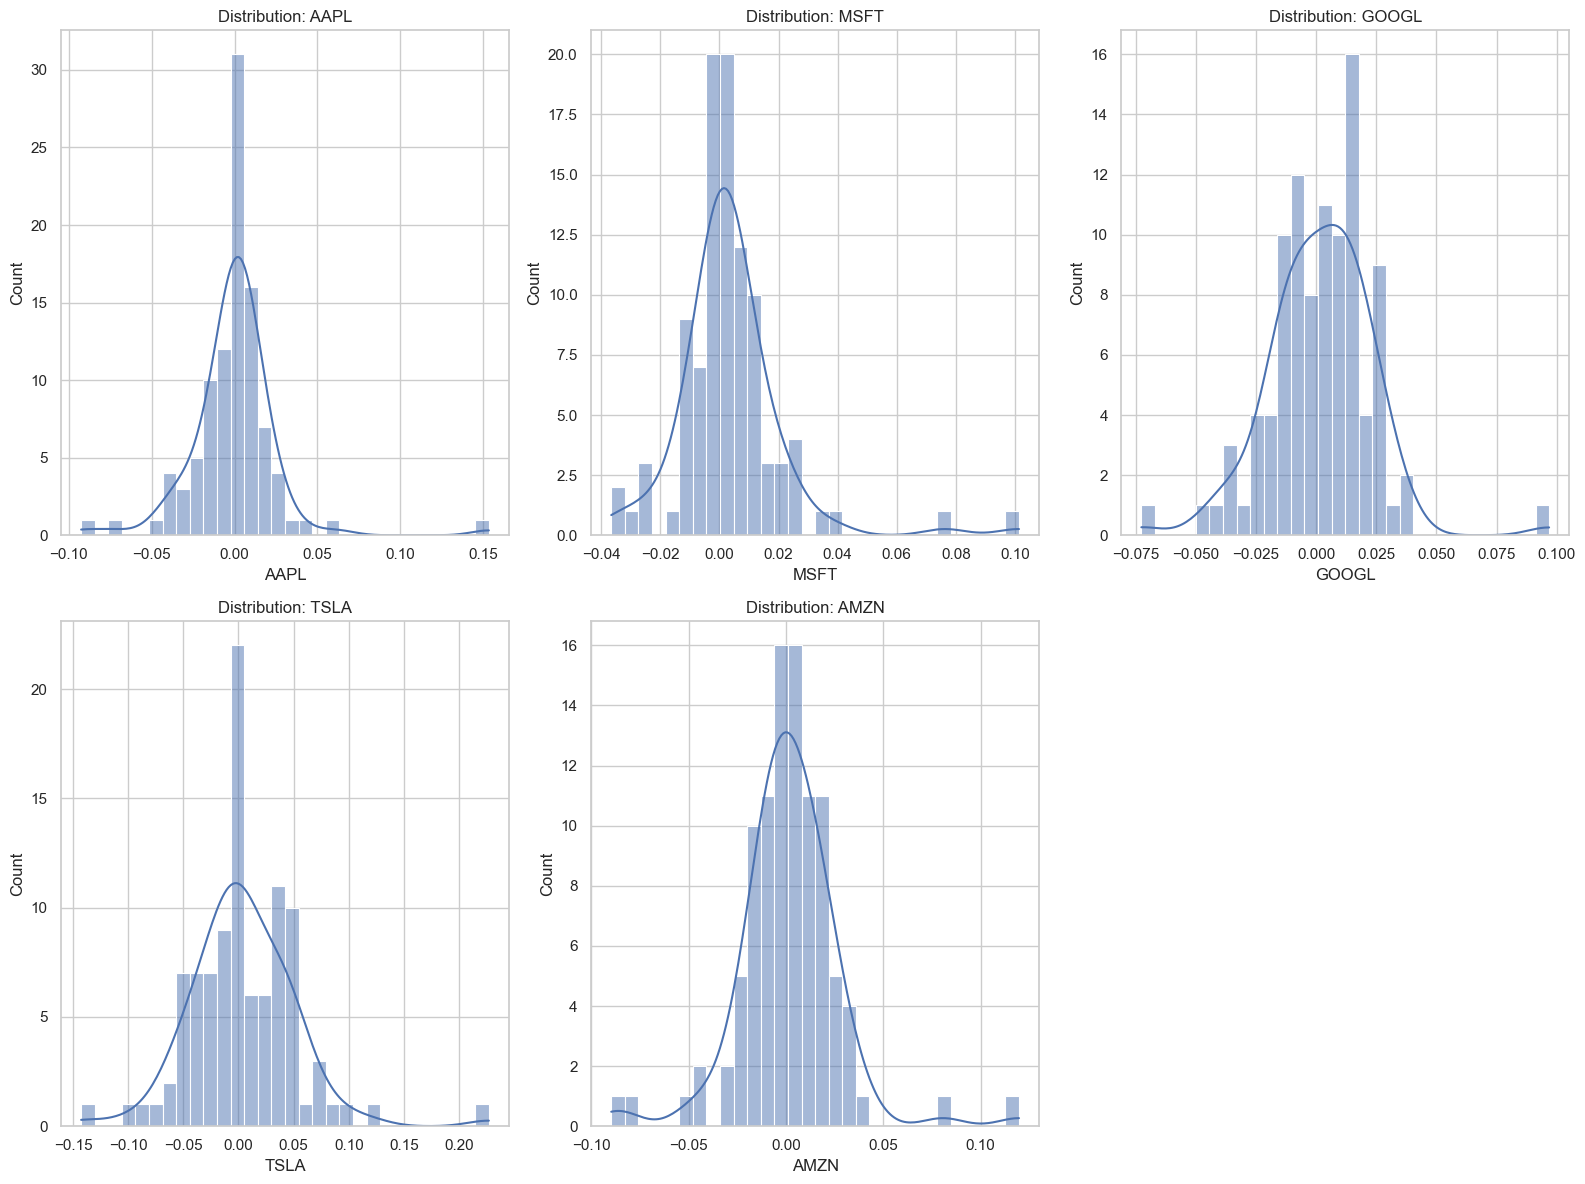

In [9]:
# --------------------------------------
# 📉 3.1 Univariate Analysis (Distribution of Each Numeric Column)
# --------------------------------------
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution: {col}')
plt.tight_layout()
plt.show()


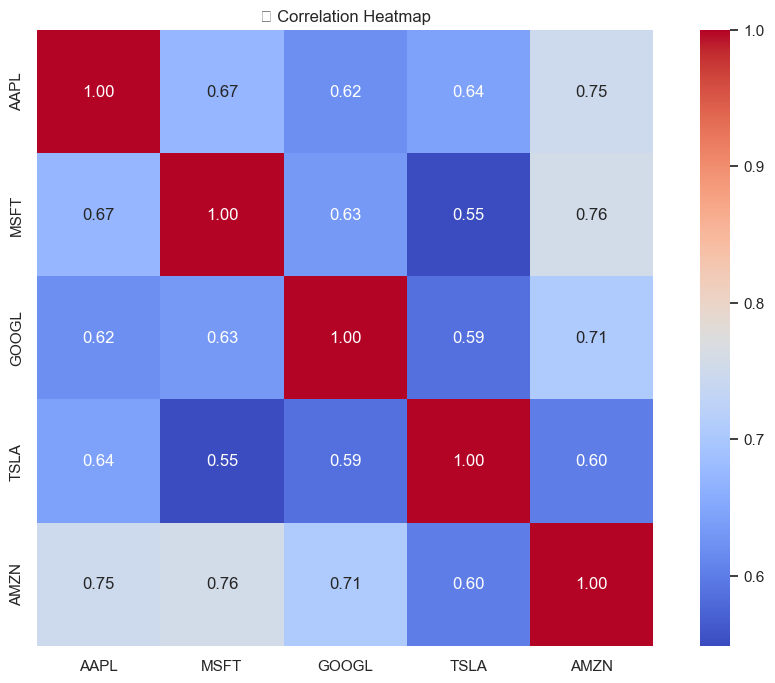

In [10]:
# --------------------------------------
# 📈 3.2 Correlation Heatmap
# --------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("📈 Correlation Heatmap")
plt.show()


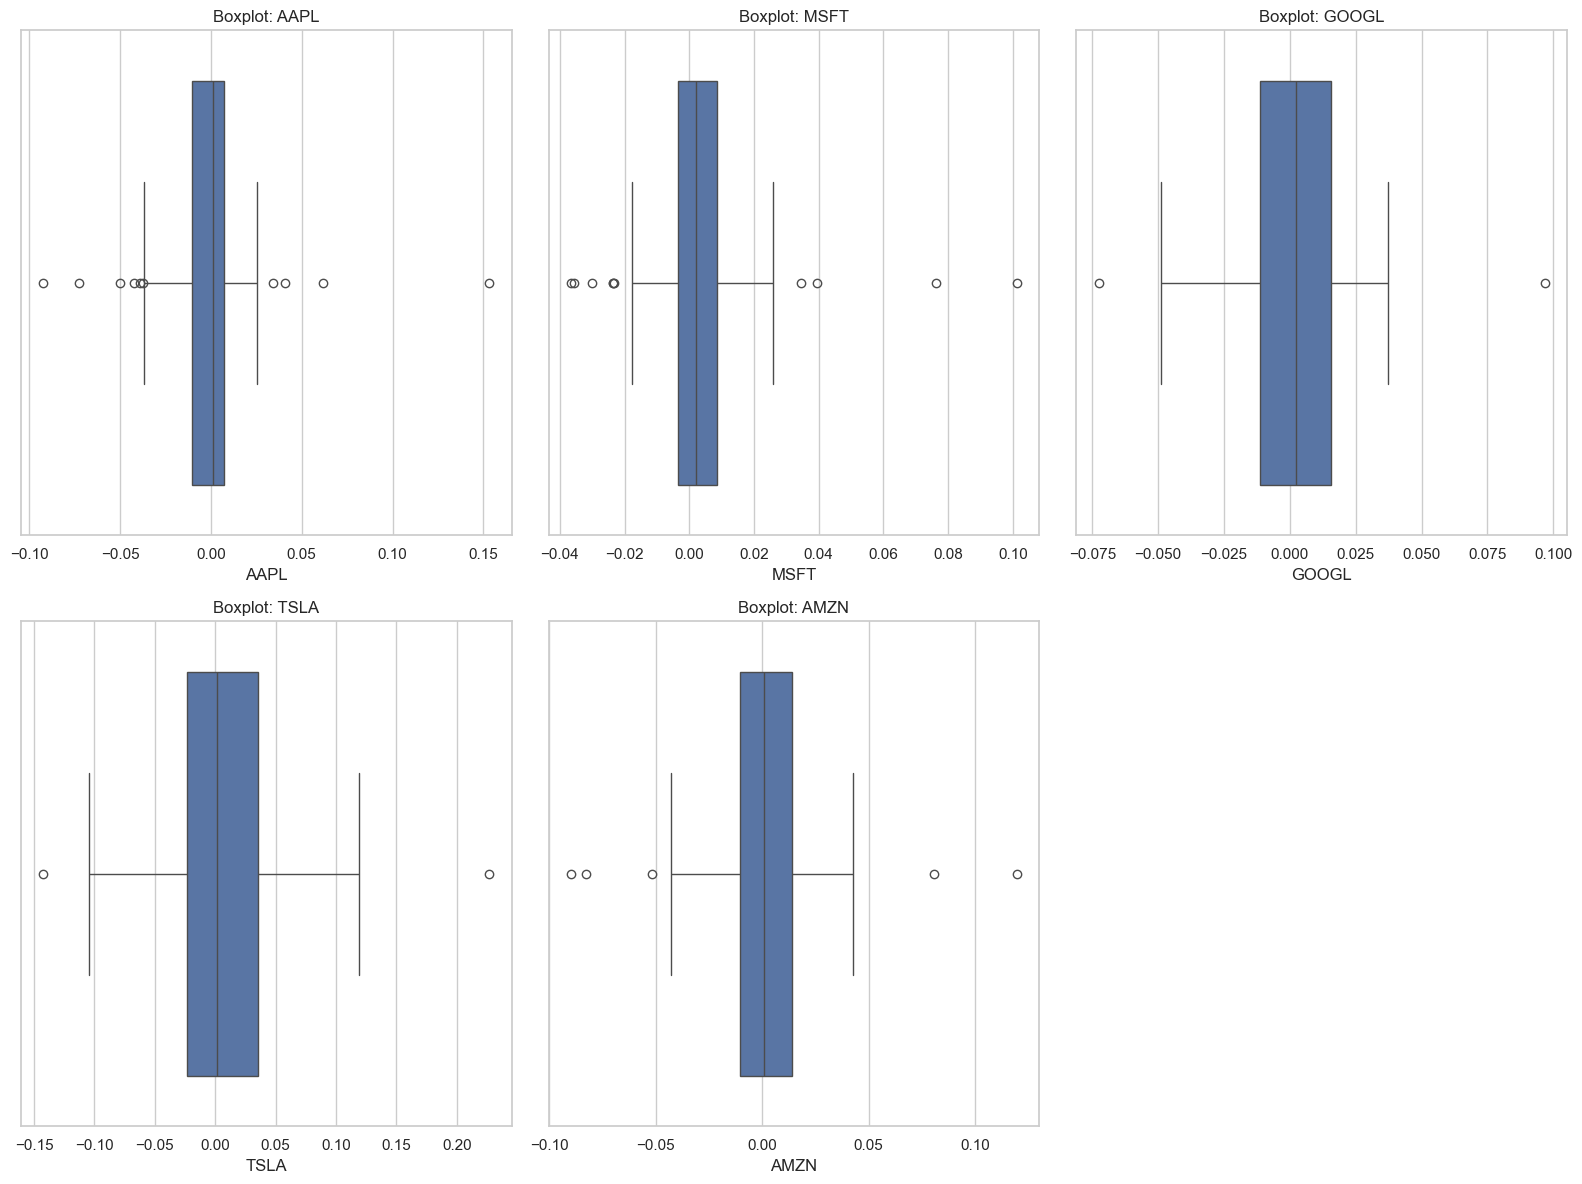

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


In [ ]:
X = df[['MSFT']]  
y = df['AAPL']     


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)


Train shape: (79, 1) | Test shape: (20, 1)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept (β₀):", model.intercept_)
print("Coefficient (β₁):", model.coef_[0])


Intercept (β₀): -0.0044104542061982445
Coefficient (β₁): 1.0538426275800772


In [15]:
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 MAE  : {mae:.6f}")
print(f"📊 MSE  : {mse:.6f}")
print(f"📊 RMSE : {rmse:.6f}")
print(f"📊 R²   : {r2:.4f}")


📊 MAE  : 0.016824
📊 MSE  : 0.000423
📊 RMSE : 0.020561
📊 R²   : 0.0569


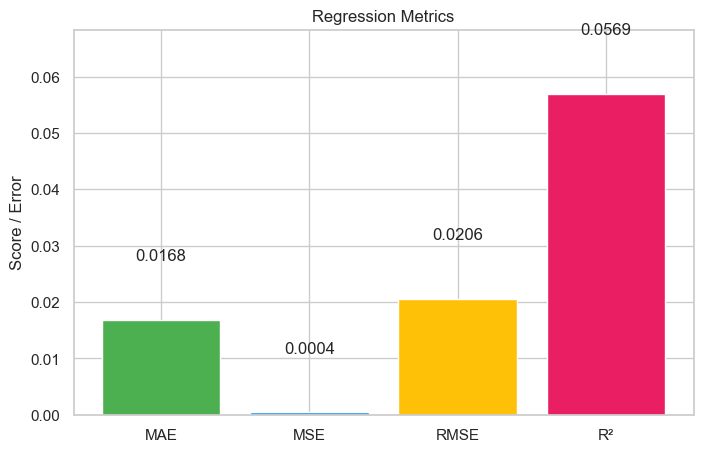

In [ ]:
import matplotlib.pyplot as plt

metrics = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics.keys(), metrics.values(), color=['#4CAF50', '#2196F3', '#FFC107', '#E91E63'])
plt.title("Regression Metrics")
plt.ylabel("Score / Error")
plt.ylim([0, max(mae, mse, rmse, abs(r2)) * 1.2])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom')

plt.show()

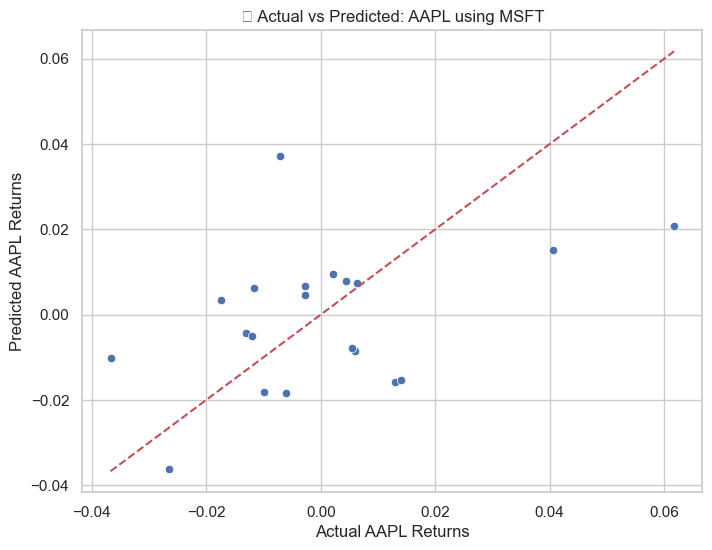

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual AAPL Returns")
plt.ylabel("Predicted AAPL Returns")
plt.title("📈 Actual vs Predicted: AAPL using MSFT")
plt.show()


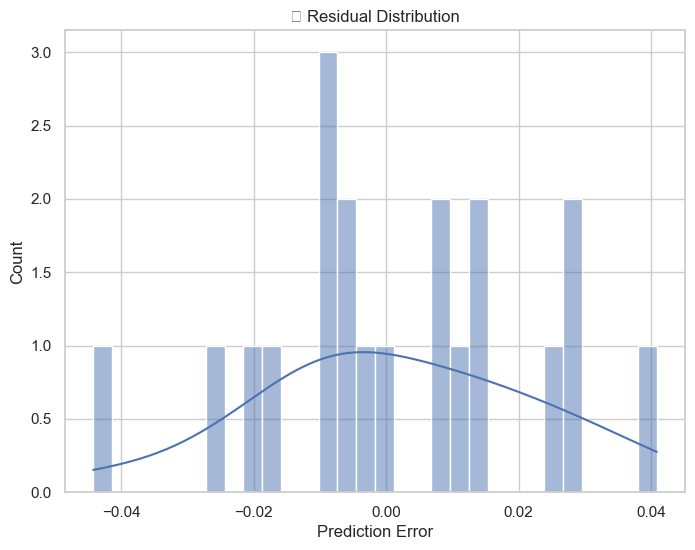

In [18]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("📉 Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()


PORTFOLIO OPTIMIZATION
Optimal Portfolio Weights:
  AAPL: 0.0000 (0.00%)
  MSFT: 1.0000 (100.00%)
  GOOGL: 0.0000 (0.00%)
  TSLA: 0.0000 (0.00%)
  AMZN: 0.0000 (0.00%)

Portfolio Metrics:
  Expected Annual Return: 0.8555
  Annual Volatility: 0.2836
  Sharpe Ratio: 3.0160


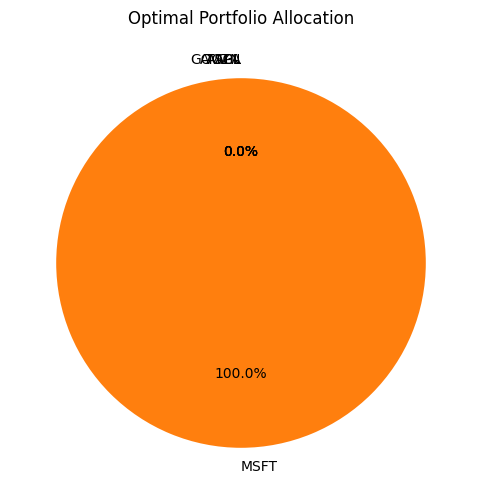


EFFICIENT FRONTIER


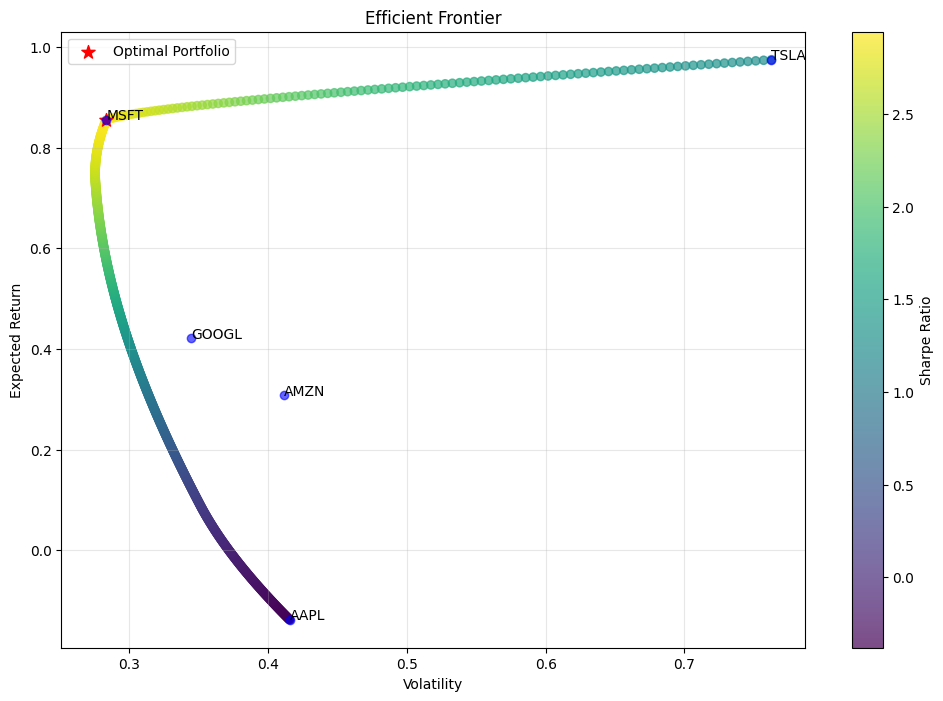


FACTOR ANALYSIS & PCA
PCA Results:
  PC1: 0.7224 (72.24%) | Cumulative: 0.7224 (72.24%)
  PC2: 0.0975 (9.75%) | Cumulative: 0.8199 (81.99%)
  PC3: 0.0783 (7.83%) | Cumulative: 0.8982 (89.82%)
  PC4: 0.0602 (6.02%) | Cumulative: 0.9584 (95.84%)
  PC5: 0.0416 (4.16%) | Cumulative: 1.0000 (100.00%)


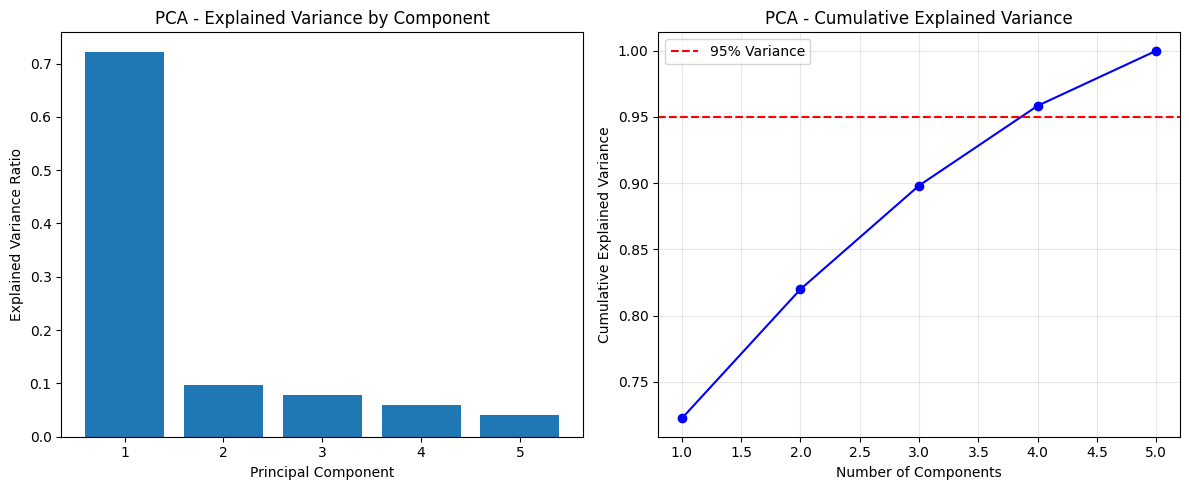


PCA Loadings (First 3 Components):
          PC1     PC2     PC3
AAPL   0.4575  0.0640 -0.4584
MSFT   0.4485 -0.4519 -0.2513
GOOGL  0.4387 -0.0914  0.8484
TSLA   0.4144  0.8388 -0.0335
AMZN   0.4748 -0.2825 -0.0757


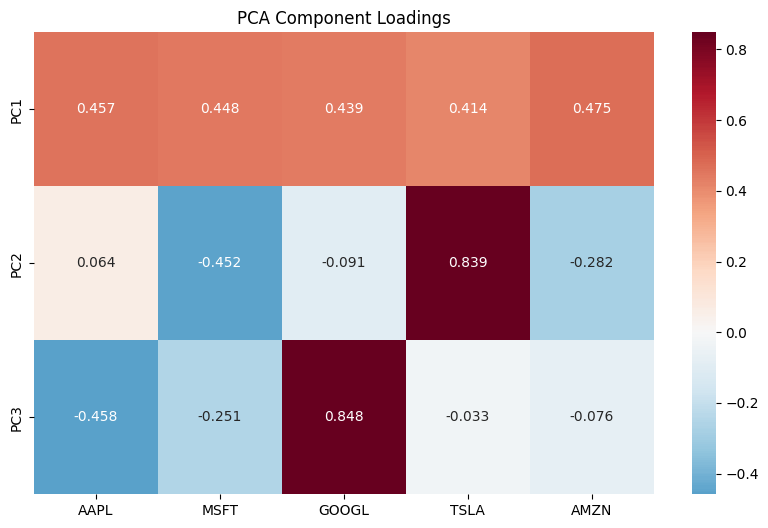


CLUSTERING ANALYSIS


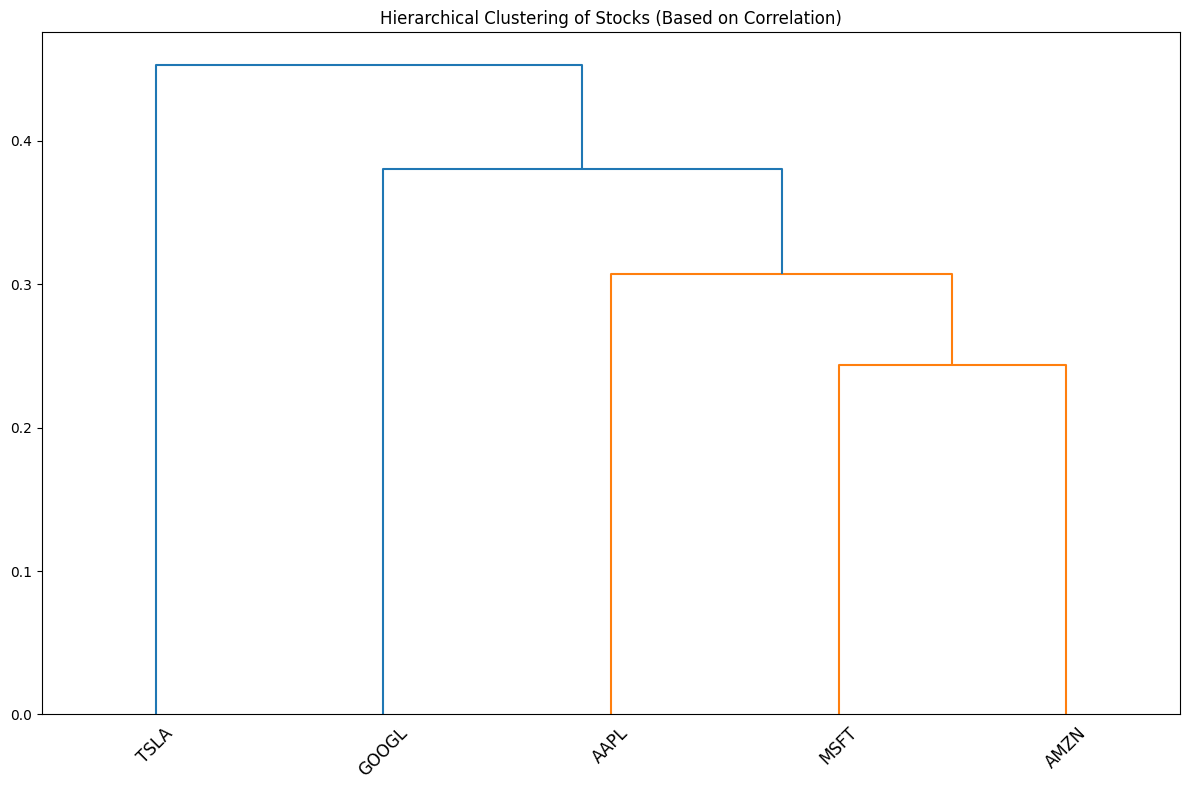

Stock Clusters:
  Cluster 0: ['MSFT', 'GOOGL', 'AMZN']
  Cluster 1: ['TSLA']
  Cluster 2: ['AAPL']

GRANGER CAUSALITY TESTS
Granger Causality P-values (X causes Y):
(Values < 0.05 indicate significant causality)
         AAPL    MSFT   GOOGL    TSLA    AMZN
AAPL   0.0000  0.3661  0.1846  0.8541  0.5894
MSFT   0.0248  0.0000  0.5091  0.8712  0.1558
GOOGL  0.2030  0.6717  0.0000  0.9077  0.9372
TSLA   0.0657  0.2292  0.2197  0.0000  0.4254
AMZN   0.2110  0.5013  0.9640  0.4315  0.0000


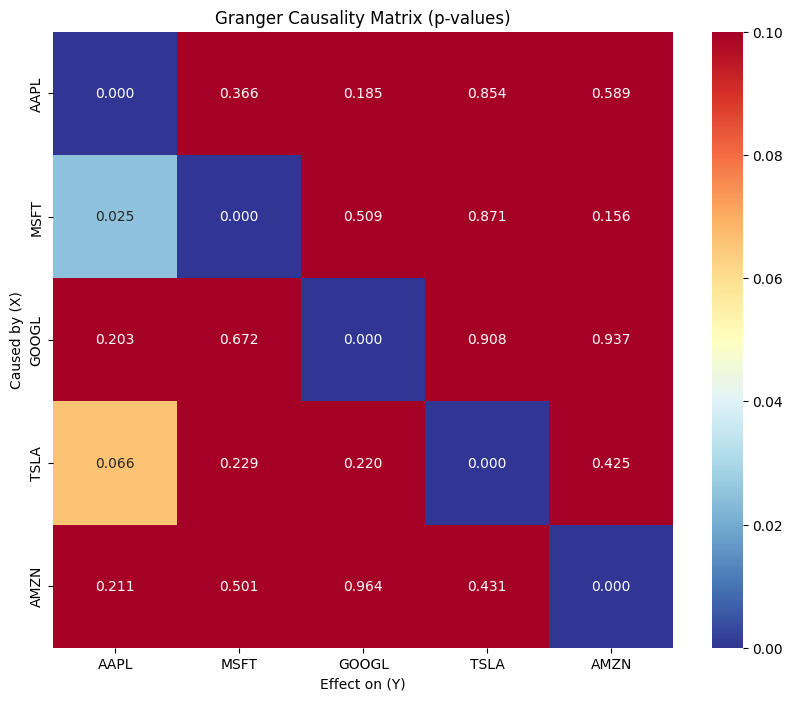


NETWORK ANALYSIS
Network Centrality Metrics:
       Degree Centrality  Betweenness Centrality  Closeness Centrality
AAPL                 1.0                     0.0                   1.0
MSFT                 1.0                     0.0                   1.0
GOOGL                1.0                     0.0                   1.0
TSLA                 1.0                     0.0                   1.0
AMZN                 1.0                     0.0                   1.0


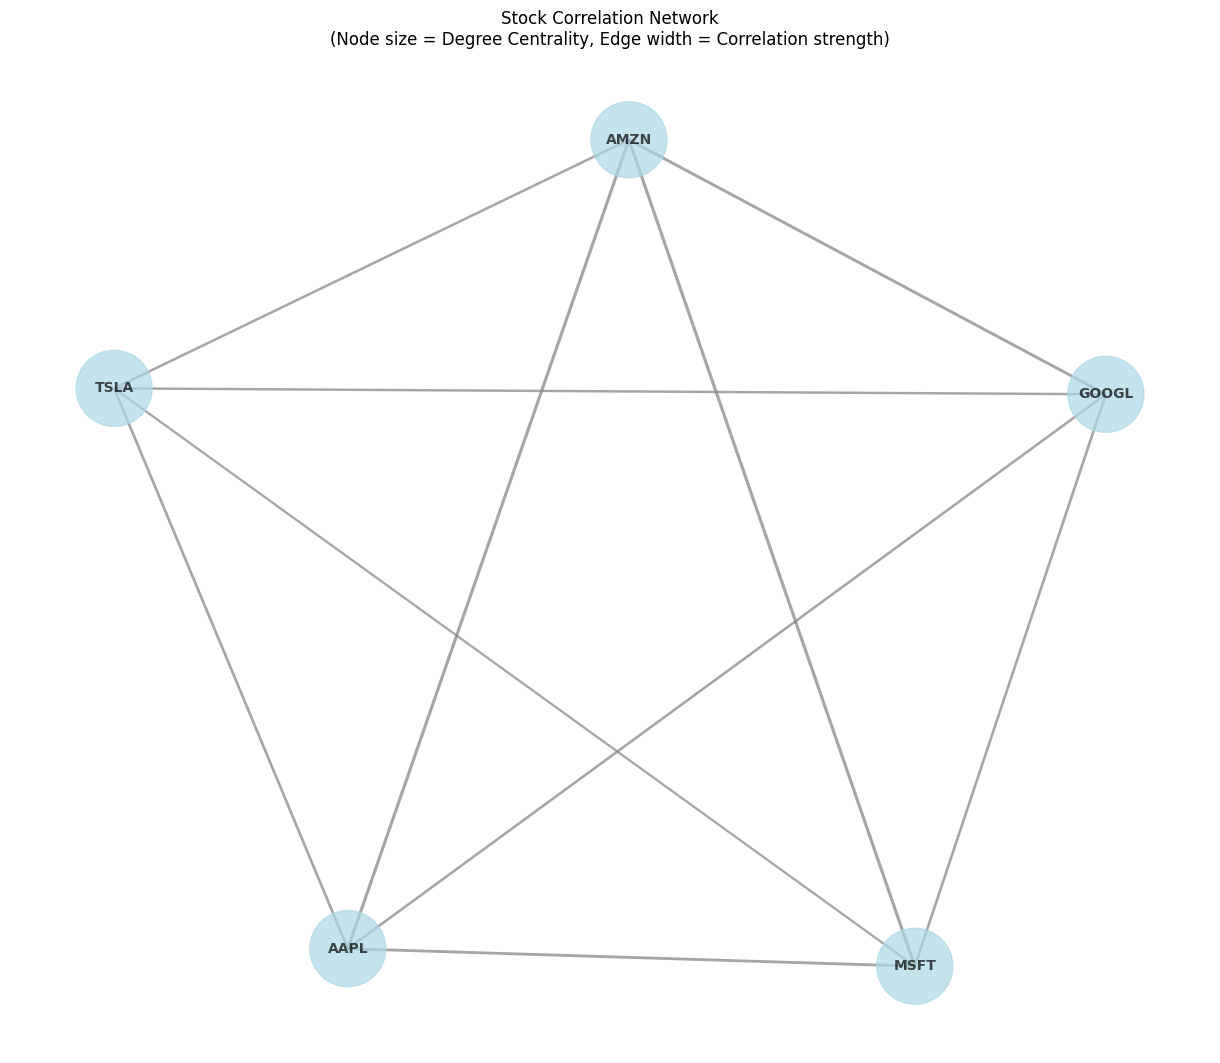


REGIME DETECTION
Regime Statistics for AAPL:
          Count  Mean Return  Volatility      Min      Max
Regime 0   26.0      0.00117     0.01001 -0.02500  0.02223
Regime 1   27.0     -0.00262     0.01320 -0.03024  0.02530
Regime 2   26.0      0.00854     0.03813 -0.04239  0.15329


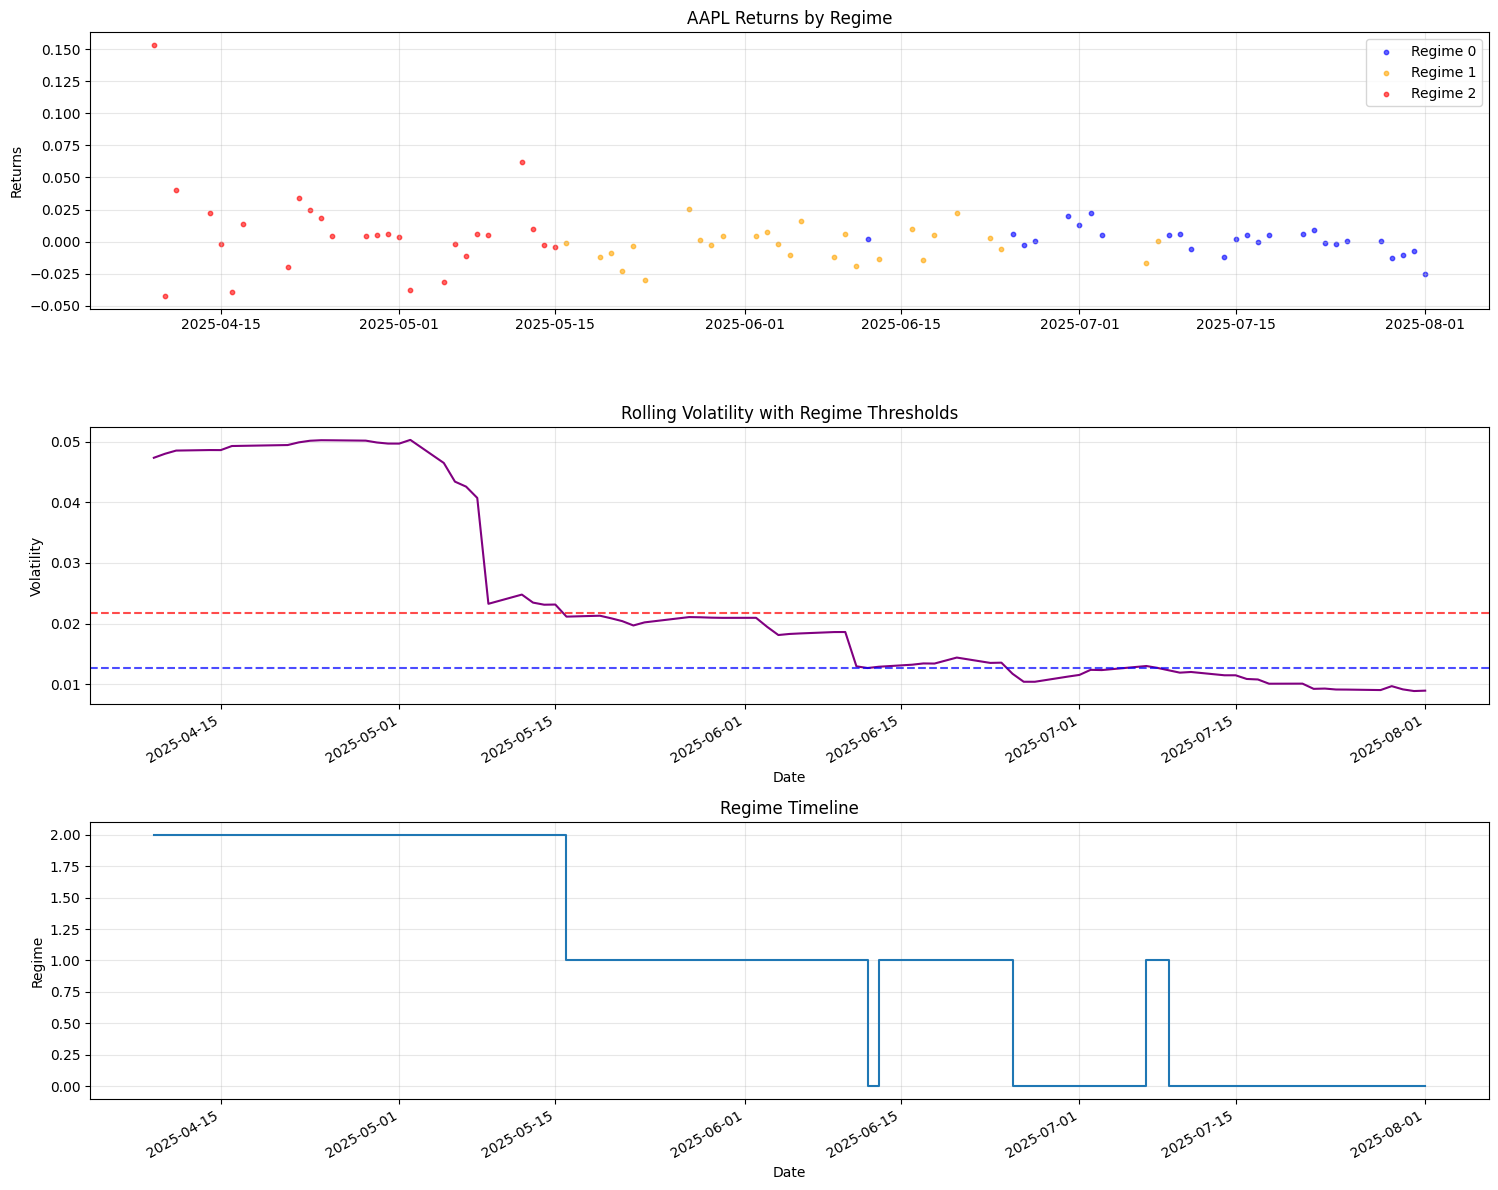


ADVANCED MACHINE LEARNING MODELS

ML Model Comparison for AAPL Prediction:
Features: 34, Samples: 79
Random Forest: RMSE = 0.005478, R² = 0.5926
Gradient Boosting: RMSE = 0.006502, R² = 0.4260
Support Vector Regression: RMSE = 0.059056, R² = -46.3559
Neural Network: RMSE = 0.559623, R² = -4251.4633
Ridge Regression: RMSE = 0.013895, R² = -1.6216
Lasso Regression: RMSE = 0.010817, R² = -0.5889
Elastic Net: RMSE = 0.007928, R² = 0.1465

Model Performance Summary:
                                MSE      RMSE           R²
Random Forest              0.000030  0.005478     0.592569
Gradient Boosting          0.000042  0.006502     0.425978
Support Vector Regression  0.003488  0.059056   -46.355865
Neural Network             0.313178  0.559623 -4251.463293
Ridge Regression           0.000193  0.013895    -1.621600
Lasso Regression           0.000117  0.010817    -0.588924
Elastic Net                0.000063  0.007928     0.146485


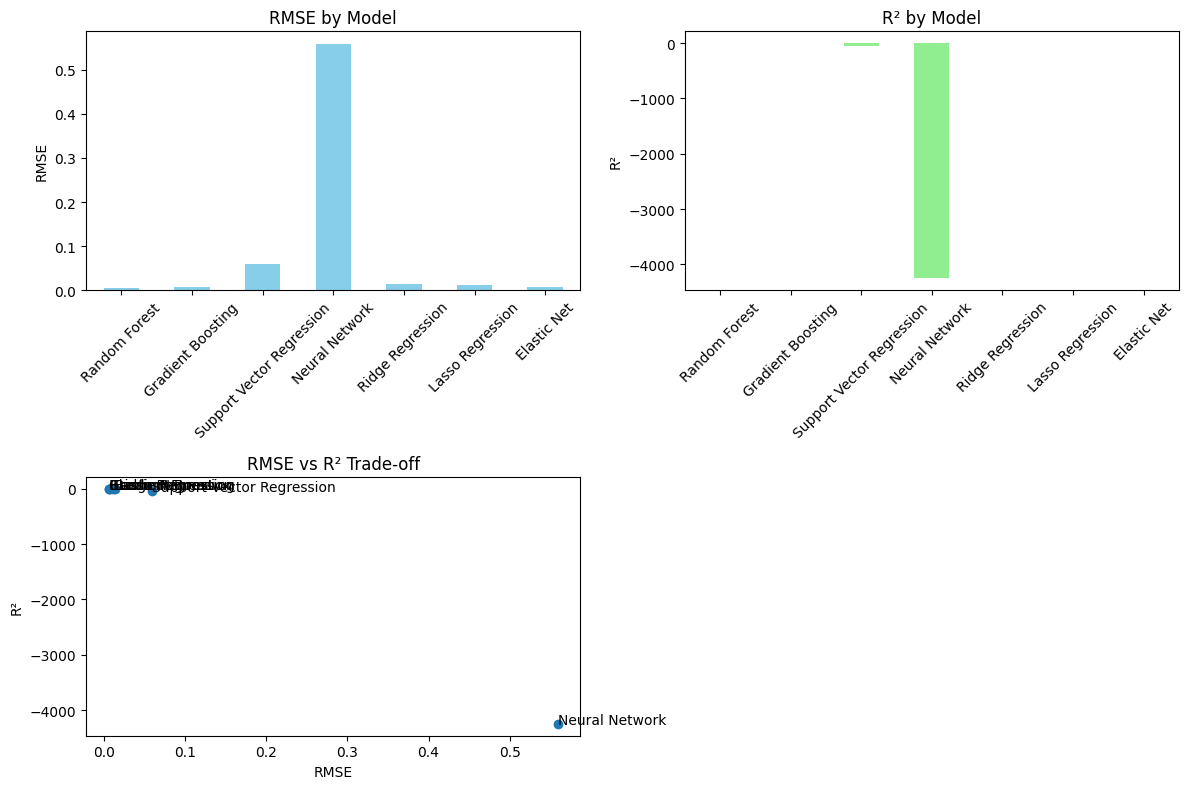


SAVING RESULTS
Advanced analysis results saved to multiple CSV files:
- portfolio_optimization_results.csv
- pca_loadings.csv
- clustering_results.csv
- network_analysis.csv
- regime_analysis.csv
- ml_model_comparison.csv

ANALYSIS COMPLETE


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.contingency_tables import mcnemar
import networkx as nx
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('D:\\Real Time Finance API Client\\Data\\all_stocks_daily_returns.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
stock_cols = [col for col in df.columns if col != 'Market_Portfolio']

print("="*60)
print("PORTFOLIO OPTIMIZATION")
print("="*60)

def portfolio_optimization(returns_df, risk_free_rate=0.02/252):
    """
    Optimize portfolio using Modern Portfolio Theory
    """
    returns = returns_df.dropna()
    n_assets = len(returns.columns)
    
    mu = returns.mean() * 252  
    cov_matrix = returns.cov() * 252  
    

    def portfolio_stats(weights, mu, cov_matrix):
        portfolio_return = np.dot(weights, mu)
        portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return portfolio_return, portfolio_vol
    
    def negative_sharpe(weights, mu, cov_matrix, risk_free_rate):
        p_ret, p_vol = portfolio_stats(weights, mu, cov_matrix)
        return -(p_ret - risk_free_rate) / p_vol


    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n_assets))
    
    init_guess = np.array([1/n_assets] * n_assets)
    
    opt_result = minimize(negative_sharpe, init_guess, 
                         args=(mu, cov_matrix, risk_free_rate),
                         method='SLSQP', bounds=bounds, constraints=constraints)
    
    optimal_weights = opt_result.x
    opt_return, opt_vol = portfolio_stats(optimal_weights, mu, cov_matrix)
    opt_sharpe = (opt_return - risk_free_rate) / opt_vol
    
    portfolio_results = {
        'Optimal Weights': dict(zip(returns.columns, optimal_weights)),
        'Expected Return': opt_return,
        'Volatility': opt_vol,
        'Sharpe Ratio': opt_sharpe
    }
    
    return portfolio_results, mu, cov_matrix

portfolio_results, expected_returns, cov_matrix = portfolio_optimization(df[stock_cols])

print("Optimal Portfolio Weights:")
for stock, weight in portfolio_results['Optimal Weights'].items():
    print(f"  {stock}: {weight:.4f} ({weight*100:.2f}%)")

print(f"\nPortfolio Metrics:")
print(f"  Expected Annual Return: {portfolio_results['Expected Return']:.4f}")
print(f"  Annual Volatility: {portfolio_results['Volatility']:.4f}")
print(f"  Sharpe Ratio: {portfolio_results['Sharpe Ratio']:.4f}")

plt.figure(figsize=(10, 6))
weights_df = pd.Series(portfolio_results['Optimal Weights'])
plt.pie(weights_df, labels=weights_df.index, autopct='%1.1f%%', startangle=90)
plt.title('Optimal Portfolio Allocation')
plt.show()

print("\n" + "="*60)
print("EFFICIENT FRONTIER")
print("="*60)

def efficient_frontier(mu, cov_matrix, n_portfolios=1000):
    """
    Generate efficient frontier
    """
    n_assets = len(mu)
    results = np.zeros((3, n_portfolios))
    
    target_returns = np.linspace(mu.min(), mu.max(), n_portfolios)
    
    for i, target in enumerate(target_returns):
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                      {'type': 'eq', 'fun': lambda x: np.dot(x, mu) - target})
        bounds = tuple((0, 1) for _ in range(n_assets))
        
        def portfolio_variance(weights):
            return np.dot(weights.T, np.dot(cov_matrix, weights))
        
        init_guess = np.array([1/n_assets] * n_assets)
        opt_result = minimize(portfolio_variance, init_guess, 
                            method='SLSQP', bounds=bounds, constraints=constraints)
        
        if opt_result.success:
            weights = opt_result.x
            results[0, i] = target  
            results[1, i] = np.sqrt(portfolio_variance(weights)) 
            results[2, i] = (target - 0.02) / results[1, i]  
    
    return results

frontier_results = efficient_frontier(expected_returns, cov_matrix)

plt.figure(figsize=(12, 8))
plt.scatter(frontier_results[1], frontier_results[0], c=frontier_results[2], 
           cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

plt.scatter(portfolio_results['Volatility'], portfolio_results['Expected Return'], 
           color='red', s=100, marker='*', label='Optimal Portfolio')

for i, stock in enumerate(stock_cols):
    plt.scatter(np.sqrt(cov_matrix.iloc[i, i]), expected_returns.iloc[i], 
               color='blue', alpha=0.6)
    plt.annotate(stock, (np.sqrt(cov_matrix.iloc[i, i]), expected_returns.iloc[i]))

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*60)
print("FACTOR ANALYSIS & PCA")
print("="*60)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[stock_cols].dropna())

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("PCA Results:")
for i, (var, cum_var) in enumerate(zip(explained_variance_ratio[:5], cumulative_variance[:5])):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%) | Cumulative: {cum_var:.4f} ({cum_var*100:.2f}%)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance by Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

loadings = pd.DataFrame(
    pca.components_[:3].T,
    columns=['PC1', 'PC2', 'PC3'],
    index=stock_cols
)

print("\nPCA Loadings (First 3 Components):")
print(loadings.round(4))

plt.figure(figsize=(10, 6))
sns.heatmap(loadings.T, annot=True, cmap='RdBu_r', center=0, fmt='.3f')
plt.title('PCA Component Loadings')
plt.show()

print("\n" + "="*60)
print("CLUSTERING ANALYSIS")
print("="*60)

correlation_matrix = df[stock_cols].corr()
distance_matrix = 1 - correlation_matrix.abs()

linkage_matrix = linkage(squareform(distance_matrix), method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=stock_cols, orientation='top')
plt.title('Hierarchical Clustering of Stocks (Based on Correlation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data.T)

cluster_results = pd.DataFrame({
    'Stock': stock_cols,
    'Cluster': clusters
})

print("Stock Clusters:")
for cluster_id in range(n_clusters):
    stocks_in_cluster = cluster_results[cluster_results['Cluster'] == cluster_id]['Stock'].tolist()
    print(f"  Cluster {cluster_id}: {stocks_in_cluster}")

print("\n" + "="*60)
print("GRANGER CAUSALITY TESTS")
print("="*60)

def granger_causality_matrix(data, maxlag=5):
    """
    Test Granger causality between all pairs of stocks
    """
    stocks = data.columns
    n_stocks = len(stocks)
    p_values = np.zeros((n_stocks, n_stocks))
    
    for i, stock1 in enumerate(stocks):
        for j, stock2 in enumerate(stocks):
            if i != j:
                try:
                    test_data = data[[stock2, stock1]].dropna()
                    if len(test_data) > 2 * maxlag:
                        result = grangercausalitytests(test_data, maxlag=maxlag, verbose=False)
                        p_values[i, j] = result[1][0]['ssr_ftest'][1]
                    else:
                        p_values[i, j] = np.nan
                except:
                    p_values[i, j] = np.nan
    
    return pd.DataFrame(p_values, index=stocks, columns=stocks)

granger_matrix = granger_causality_matrix(df[stock_cols])

print("Granger Causality P-values (X causes Y):")
print("(Values < 0.05 indicate significant causality)")
print(granger_matrix.round(4))

plt.figure(figsize=(10, 8))
mask = granger_matrix.isna()
sns.heatmap(granger_matrix, annot=True, fmt='.3f', cmap='RdYlBu_r', 
           mask=mask, center=0.05, vmin=0, vmax=0.1)
plt.title('Granger Causality Matrix (p-values)')
plt.ylabel('Caused by (X)')
plt.xlabel('Effect on (Y)')
plt.show()

print("\n" + "="*60)
print("NETWORK ANALYSIS")
print("="*60)

correlation_threshold = 0.5
G = nx.Graph()

for stock in stock_cols:
    G.add_node(stock)

for i, stock1 in enumerate(stock_cols):
    for j, stock2 in enumerate(stock_cols):
        if i < j:  
            corr = correlation_matrix.loc[stock1, stock2]
            if abs(corr) > correlation_threshold:
                G.add_edge(stock1, stock2, weight=abs(corr))

centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

network_metrics = pd.DataFrame({
    'Degree Centrality': centrality,
    'Betweenness Centrality': betweenness,
    'Closeness Centrality': closeness
})

print("Network Centrality Metrics:")
print(network_metrics.round(4))

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=1, iterations=50)

node_sizes = [centrality[node] * 3000 for node in G.nodes()]
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

nx.draw(G, pos, 
        node_size=node_sizes, 
        node_color='lightblue', 
        width=[w*3 for w in weights],
        alpha=0.7,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='gray')

plt.title('Stock Correlation Network\n(Node size = Degree Centrality, Edge width = Correlation strength)')
plt.axis('off')
plt.show()

print("\n" + "="*60)
print("REGIME DETECTION")
print("="*60)

def simple_regime_detection(returns, window=21):
    """
    Simple regime detection based on rolling volatility
    """
    rolling_vol = returns.rolling(window=window).std()
    vol_quantiles = rolling_vol.quantile([0.33, 0.67])
    
    regimes = pd.Series(index=returns.index, dtype=int)
    regimes[rolling_vol <= vol_quantiles.iloc[0]] = 0 
    regimes[(rolling_vol > vol_quantiles.iloc[0]) & (rolling_vol <= vol_quantiles.iloc[1])] = 1  
    regimes[rolling_vol > vol_quantiles.iloc[1]] = 2  
    
    return regimes, rolling_vol


sample_stock = stock_cols[0]
regimes, rolling_vol = simple_regime_detection(df[sample_stock])


regime_stats = {}
for regime in [0, 1, 2]:
    regime_data = df[sample_stock][regimes == regime]
    if len(regime_data) > 0:
        regime_stats[f'Regime {regime}'] = {
            'Count': len(regime_data),
            'Mean Return': regime_data.mean(),
            'Volatility': regime_data.std(),
            'Min': regime_data.min(),
            'Max': regime_data.max()
        }

regime_df = pd.DataFrame(regime_stats).T
print(f"Regime Statistics for {sample_stock}:")
print(regime_df.round(5))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

colors = ['blue', 'orange', 'red']
for regime in [0, 1, 2]:
    mask = regimes == regime
    ax1.scatter(df.index[mask], df[sample_stock][mask], 
               c=colors[regime], alpha=0.6, s=10, 
               label=f'Regime {regime}')
ax1.set_title(f'{sample_stock} Returns by Regime')
ax1.set_ylabel('Returns')
ax1.legend()
ax1.grid(True, alpha=0.3)

rolling_vol.plot(ax=ax2, color='purple')
ax2.axhline(y=rolling_vol.quantile(0.33), color='blue', linestyle='--', alpha=0.7)
ax2.axhline(y=rolling_vol.quantile(0.67), color='red', linestyle='--', alpha=0.7)
ax2.set_title('Rolling Volatility with Regime Thresholds')
ax2.set_ylabel('Volatility')
ax2.grid(True, alpha=0.3)

regimes.plot(ax=ax3, drawstyle='steps-post')
ax3.set_title('Regime Timeline')
ax3.set_ylabel('Regime')
ax3.set_xlabel('Date')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ADVANCED MACHINE LEARNING MODELS")
print("="*60)

def ml_model_comparison(X, y, test_size=0.2):
    """
    Compare different ML models for stock prediction
    """
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.svm import SVR
    from sklearn.neural_network import MLPRegressor
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                        shuffle=False, random_state=42)
    
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Support Vector Regression': SVR(kernel='rbf'),
        'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5)
    }
    
    results = {}
    
    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            results[name] = {
                'MSE': mse,
                'RMSE': np.sqrt(mse),
                'R²': r2
            }
            
            print(f"{name}: RMSE = {np.sqrt(mse):.6f}, R² = {r2:.4f}")
            
        except Exception as e:
            print(f"{name}: Failed - {str(e)}")
            results[name] = {'MSE': np.nan, 'RMSE': np.nan, 'R²': np.nan}
    
    return pd.DataFrame(results).T

def create_features(data, target_stock, lags=5):
    """
    Create features for ML models
    """
    features = pd.DataFrame(index=data.index)
    
    for stock in data.columns:
        for lag in range(1, lags + 1):
            features[f'{stock}_lag_{lag}'] = data[stock].shift(lag)
    
    target_data = data[target_stock]
    
    for window in [5, 10, 21]:
        features[f'MA_{window}'] = target_data.rolling(window=window).mean()
        features[f'MA_ratio_{window}'] = target_data / features[f'MA_{window}']
    
    features['volatility_5'] = target_data.rolling(window=5).std()
    features['volatility_21'] = target_data.rolling(window=21).std()
    
    delta = target_data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    features['RSI'] = 100 - (100 / (1 + rs))
    
    return features.dropna()

target_stock = 'AAPL'  
features = create_features(df[stock_cols], target_stock)
X = features.drop(columns=[col for col in features.columns if target_stock in col and 'lag' not in col])
y = df[target_stock].loc[X.index]

print(f"\nML Model Comparison for {target_stock} Prediction:")
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")

ml_results = ml_model_comparison(X, y)
print("\nModel Performance Summary:")
print(ml_results.round(6))

plt.figure(figsize=(12, 8))
ml_results_clean = ml_results.dropna()

plt.subplot(2, 2, 1)
ml_results_clean['RMSE'].plot(kind='bar', color='skyblue')
plt.title('RMSE by Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
ml_results_clean['R²'].plot(kind='bar', color='lightgreen')
plt.title('R² by Model')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.scatter(ml_results_clean['RMSE'], ml_results_clean['R²'])
for i, model in enumerate(ml_results_clean.index):
    plt.annotate(model, (ml_results_clean['RMSE'].iloc[i], ml_results_clean['R²'].iloc[i]))
plt.xlabel('RMSE')
plt.ylabel('R²')
plt.title('RMSE vs R² Trade-off')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

all_results = {
    'Portfolio_Optimization': portfolio_results,
    'PCA_Explained_Variance': explained_variance_ratio,
    'PCA_Loadings': loadings,
    'Clustering': cluster_results,
    'Network_Metrics': network_metrics,
    'Regime_Stats': regime_df,
    'ML_Model_Performance': ml_results
}

portfolio_weights_df = pd.DataFrame([portfolio_results['Optimal Weights']])
portfolio_weights_df.to_csv('portfolio_optimization_results.csv', index=False)

loadings.to_csv('pca_loadings.csv')
cluster_results.to_csv('clustering_results.csv', index=False)
network_metrics.to_csv('network_analysis.csv')
regime_df.to_csv('regime_analysis.csv')
ml_results.to_csv('ml_model_comparison.csv')
